<a href="https://colab.research.google.com/github/C-Arul321/Arul.C/blob/main/Copy_of_Source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving housing (1).csv to housing (1) (2).csv
Data loaded: housing (1) (2).csv, shape = (149, 13)


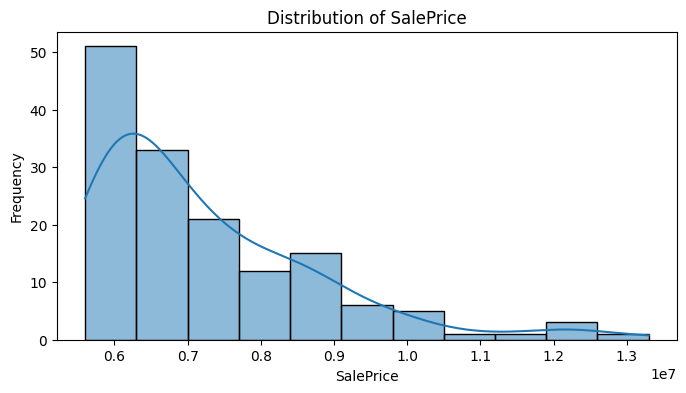

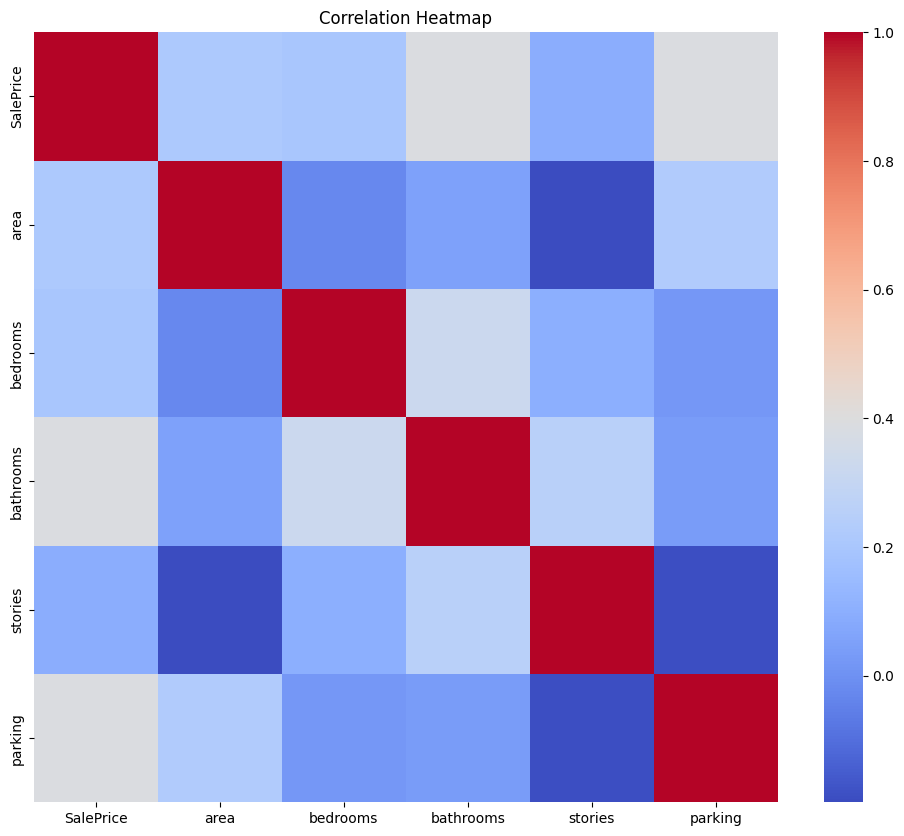

Top correlated features with SalePrice:
bathrooms    0.391029
parking      0.388224
area         0.213278
bedrooms     0.199470
stories      0.096914
Name: SalePrice, dtype: float64
Linear Regression Performance:
 RMSE: 1139753.90
 R² Score: 0.11
----------------------------------------


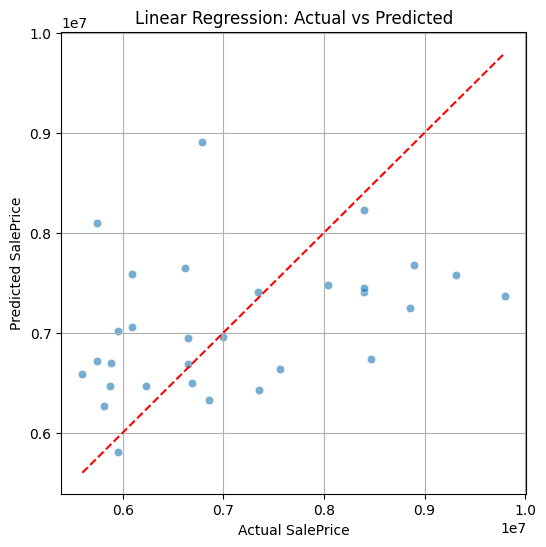

XGBoost Regressor Performance:
 RMSE: 1402516.27
 R² Score: -0.35
----------------------------------------


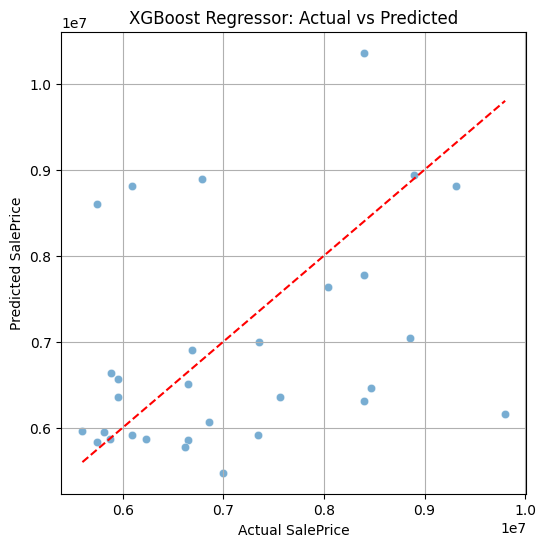

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Install necessary libraries
!pip install xgboost joblib --quiet

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from google.colab import files as gcf  # Avoid naming conflict

# Load data from local upload
def load_data():
    uploaded = gcf.upload()
    housing = list(uploaded.keys())[0]
    data = pd.read_csv(housing)
    print(f"Data loaded: {housing}, shape = {data.shape}")
    if 'SalePrice' not in data.columns:
        data = data.rename(columns={'prices': 'SalePrice'})
    return data

# Preprocess data
def preprocess_data(df):
    df['SalePrice'] = pd.to_numeric(df['SalePrice'], errors='coerce')
    df = df.drop(columns=['Id'], errors='ignore')
    df = df.select_dtypes(include=[np.number])
    df = df.dropna()
    return df

# Visualize data
def visualize_data(df, target='SalePrice'):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[target], kde=True)
    plt.title("Distribution of SalePrice")
    plt.xlabel("SalePrice")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(12, 10))
    corr = df.corr()
    sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

    top_corr = corr[target].drop(target).abs().sort_values(ascending=False).head(5)
    print("Top correlated features with SalePrice:")
    print(top_corr)

# Prepare data
def prepare_data(df, target='SalePrice'):
    X = df.drop(columns=[target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Train models
def train_models(X_train, y_train):
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb.fit(X_train, y_train)

    return lr, xgb

# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{model_name} Performance:")
    print(f" RMSE: {rmse:.2f}")
    print(f" R² Score: {r2:.2f}")
    print("-" * 40)

    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=preds, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel("Actual SalePrice")
    plt.ylabel("Predicted SalePrice")
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.grid(True)
    plt.show()

# Main Execution
df = load_data()
df_clean = preprocess_data(df)
visualize_data(df_clean)
X_train, X_test, y_train, y_test, scaler = prepare_data(df_clean)
lr_model, xgb_model = train_models(X_train, y_train)
evaluate_model(lr_model, X_test, y_test, "Linear Regression")
evaluate_model(xgb_model, X_test, y_test, "XGBoost Regressor")

# Save models and scaler
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Download saved files
gcf.download('linear_regression_model.pkl')
gcf.download('xgboost_model.pkl')
gcf.download('scaler.pkl')